# Assignment No. 1 - Network Analysis

## Importing Libraries

In [4]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from collections import Counter

## Introduction

In [5]:
my_graph = nx.read_edgelist("../data/dataset.txt", create_using=nx.Graph(), nodetype=int)

In [6]:
number_of_nodes = my_graph.number_of_nodes()
print("Number of nodes: ", number_of_nodes)
number_of_links = my_graph.number_of_edges()
print("Number of edges: ", number_of_links)
average_degree = sum(
    dict(my_graph.degree()).values()) / my_graph.number_of_nodes()
print("Average Degree: ", average_degree)

Number of nodes:  81306
Number of edges:  1342310
Average Degree:  33.018719405701916


## Graph Visualization

In [7]:
nx.write_gexf(my_graph, "../data/dataset.gexf")
# then the file is imported to Gephi to visualize the graph

## Giant Component

In [8]:
def get_giant_component_info(graph):
    giant_component = max(nx.connected_components(graph), key=len)
    giant_component_graph = graph.subgraph(giant_component)
    return giant_component, giant_component_graph

In [9]:
giant_component, giant_component_graph = get_giant_component_info(my_graph)
print("Giant Component - Number of nodes: ", giant_component_graph.number_of_nodes())
print("Giant Component - Number of edges: ", giant_component_graph.number_of_edges())

Giant Component - Number of nodes:  81306
Giant Component - Number of edges:  1342310


## Data Subsampling

In [10]:
graph_nodes_list = list(my_graph.nodes())
new_graph_size = 20000
new_graph_nodes = random.sample(graph_nodes_list, new_graph_size)
new_graph = my_graph.subgraph(new_graph_nodes)
print("New Graph - Number of nodes: ", new_graph.number_of_nodes())
print("New Graph - Number of edges: ", new_graph.number_of_edges())
average_degree = sum(
    dict(new_graph.degree()).values()) / new_graph.number_of_nodes()
print("Average Degree: ", average_degree)

New Graph - Number of nodes:  20000
New Graph - Number of edges:  80208
Average Degree:  8.0208


In [27]:
nx.write_gexf(new_graph, "../data/new_graph.gexf")

## Subsampled Data - Giant Component

In [28]:
new_giant_component, new_giant_component_graph = get_giant_component_info(new_graph)
print("Giant Component - Number of nodes: ", new_giant_component_graph.number_of_nodes())
print("Giant Component - Number of edges: ", new_giant_component_graph.number_of_edges())

Giant Component - Number of nodes:  16263
Giant Component - Number of edges:  81262


In [29]:
nx.write_gexf(new_giant_component_graph, "../data/new_giant_component_graph.gexf")

## Graph Characterization

### Average Degree

In [30]:
average_degree = sum(
    dict(new_giant_component_graph.degree()).values()) / new_giant_component_graph.number_of_nodes()
print("Average Degree: ", average_degree)

Average Degree:  9.99348213736703


### Approximate Diameter

In [31]:
def approximate_diameter(G, approximate_size=100):
    nodes = list(G.nodes())
    sample_chosen_nodes = random.sample(nodes, min(approximate_size, len(nodes)))
    shortest_paths = nx.multi_source_dijkstra_path_length(G, sample_chosen_nodes)
    return max(shortest_paths.values())
approx_diameter = approximate_diameter(giant_component_graph)
print("Approximate Diameter: ", approx_diameter)

Approximate Diameter:  4


## Centrality Measures

### Average Closeness

In [32]:
sample_size = 100
closeness_values = []
for i in range(sample_size):
    closeness_values.append(
        nx.closeness_centrality(giant_component_graph, u=random.choice(list(giant_component_graph.nodes()))))
print("Average Closeness Centrality: ", sum(closeness_values) / sample_size)

Average Closeness Centrality:  0.25557956219254163


### Average Betweenness

In [37]:
sample_size = min(100, len(giant_component_graph.nodes()))
betweenness_values = []
for i in range(sample_size):
    node = random.choice(list(giant_component_graph.nodes()))
    betweenness_values.append(nx.betweenness_centrality(giant_component_graph, k=1)[node])
print("Average Betweenness Centrality: ", sum(betweenness_values) / sample_size)

Average Betweenness Centrality:  9.202520519968027e-06


## Clustering Coefficient

In [34]:
clustering_coefficient = nx.average_clustering(new_giant_component_graph)
print("Clustering Coefficient: ", clustering_coefficient)

Clustering Coefficient:  0.44579133775494517


## Transitivity

In [35]:
transitivity = nx.transitivity(new_giant_component_graph)
print("Transitivity: ", transitivity)

Transitivity:  0.16366711205907447


## Degree Distribution

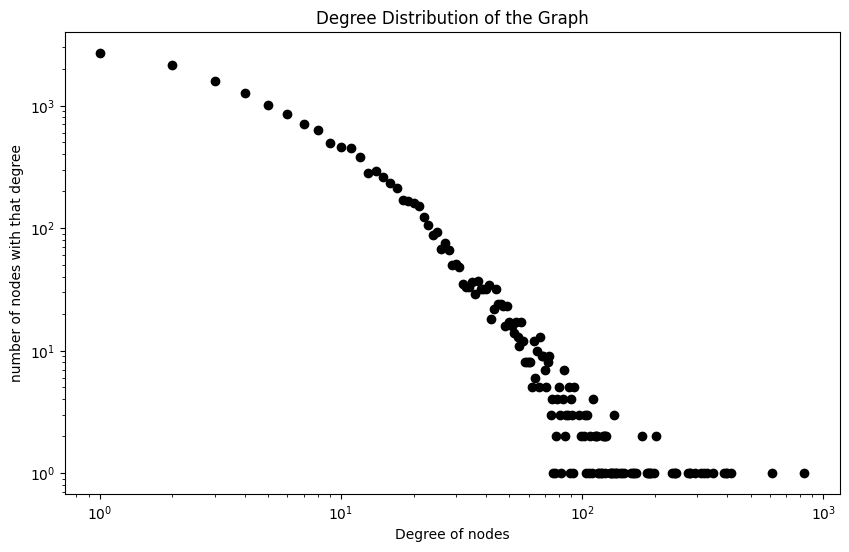

In [36]:
degree_sequence = [d for n, d in new_giant_component_graph.degree()]
degree_counts = Counter(degree_sequence)
degrees = list(degree_counts.keys())
counts = list(degree_counts.values())

plt.figure(figsize=(10, 6))
plt.scatter(degrees, counts, color='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree of nodes')
plt.ylabel('number of nodes with that degree')
plt.title('Degree Distribution of the Graph')
plt.show()